<span style="font-family:Avenir;">
<font color="yellow"> <h1> Example </font> Title </h1> 
</span>

<span style="font-family:Avenir;">
<font color="LavenderBlush"> <h2> Stating Questions </h2> </font>
</span>



<span style="font-family:Avenir; font-size:1.4em;">
✦ <font color="Cyan"> What </font> is the
<font color="Pink"> correlation </font> between the
<font color="Cyan"> number of watchers </font> and the
<font color="Cyan"> number of pull requests </font> for each
<font color="Pink"> programming language </font>?
</span>

<span style="font-family:Avenir;">

<table style="width:100%; border-collapse:collapse; table-layout:fixed;">
  <thead>
    <tr>
      <th style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      <font color="DeepSkyBlue">Set Expectations</font>
      </th>
      <th style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      <font color="DeepSkyBlue">Collect Data</font>
      </th>
      <th style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      <font color="DeepSkyBlue">Match Expectations & Data</font>
      </th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      The question is specific, interest and novel.
      </td>
      <td style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      The question is specific using a statistical test. It is interesting as it will help the business in the chioce of the programming language to use in the next project (the question is directly related to the community support). It is novel as it has not been asked before as far as my research goes, and the closest question I found to that is disscussed in this paper <a href='https://www.researchgate.net/publication/263847951_Understanding_Watchers_on_GitHub'>Understanding Watchers on GitHub</a>.
      </td>
      <td style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      The question is indeed specific, interest and novel.
      </td>
    </tr>
  </tbody>
</table>

</span>



<span style="font-family:Avenir;">
<font color="LavenderBlush"> <h2> Exploratory Data Analytics</h2> </font>
</span>

### imports

In [1]:
import sys; sys.path.append('../../')
from DataPreparation.Preprocess import read_data 
from DataPreparation.Visualize import convey_insights

In [2]:
# TODO:Remove
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use('dark_background')
plt.rcParams['figure.dpi'] = 300

### Read Data

In [3]:
x_data_d, _ = read_data(kind="all", fix=True)

In [4]:
# TODO:Remove
def replace_missing_with_document(x_data_d):
  return x_data_d.replace({'primaryLanguage': {'-1': 'Document'}})

x_data_d = replace_missing_with_document(x_data_d)

### Explore the distribution of watch and contribution (pull requests) columns

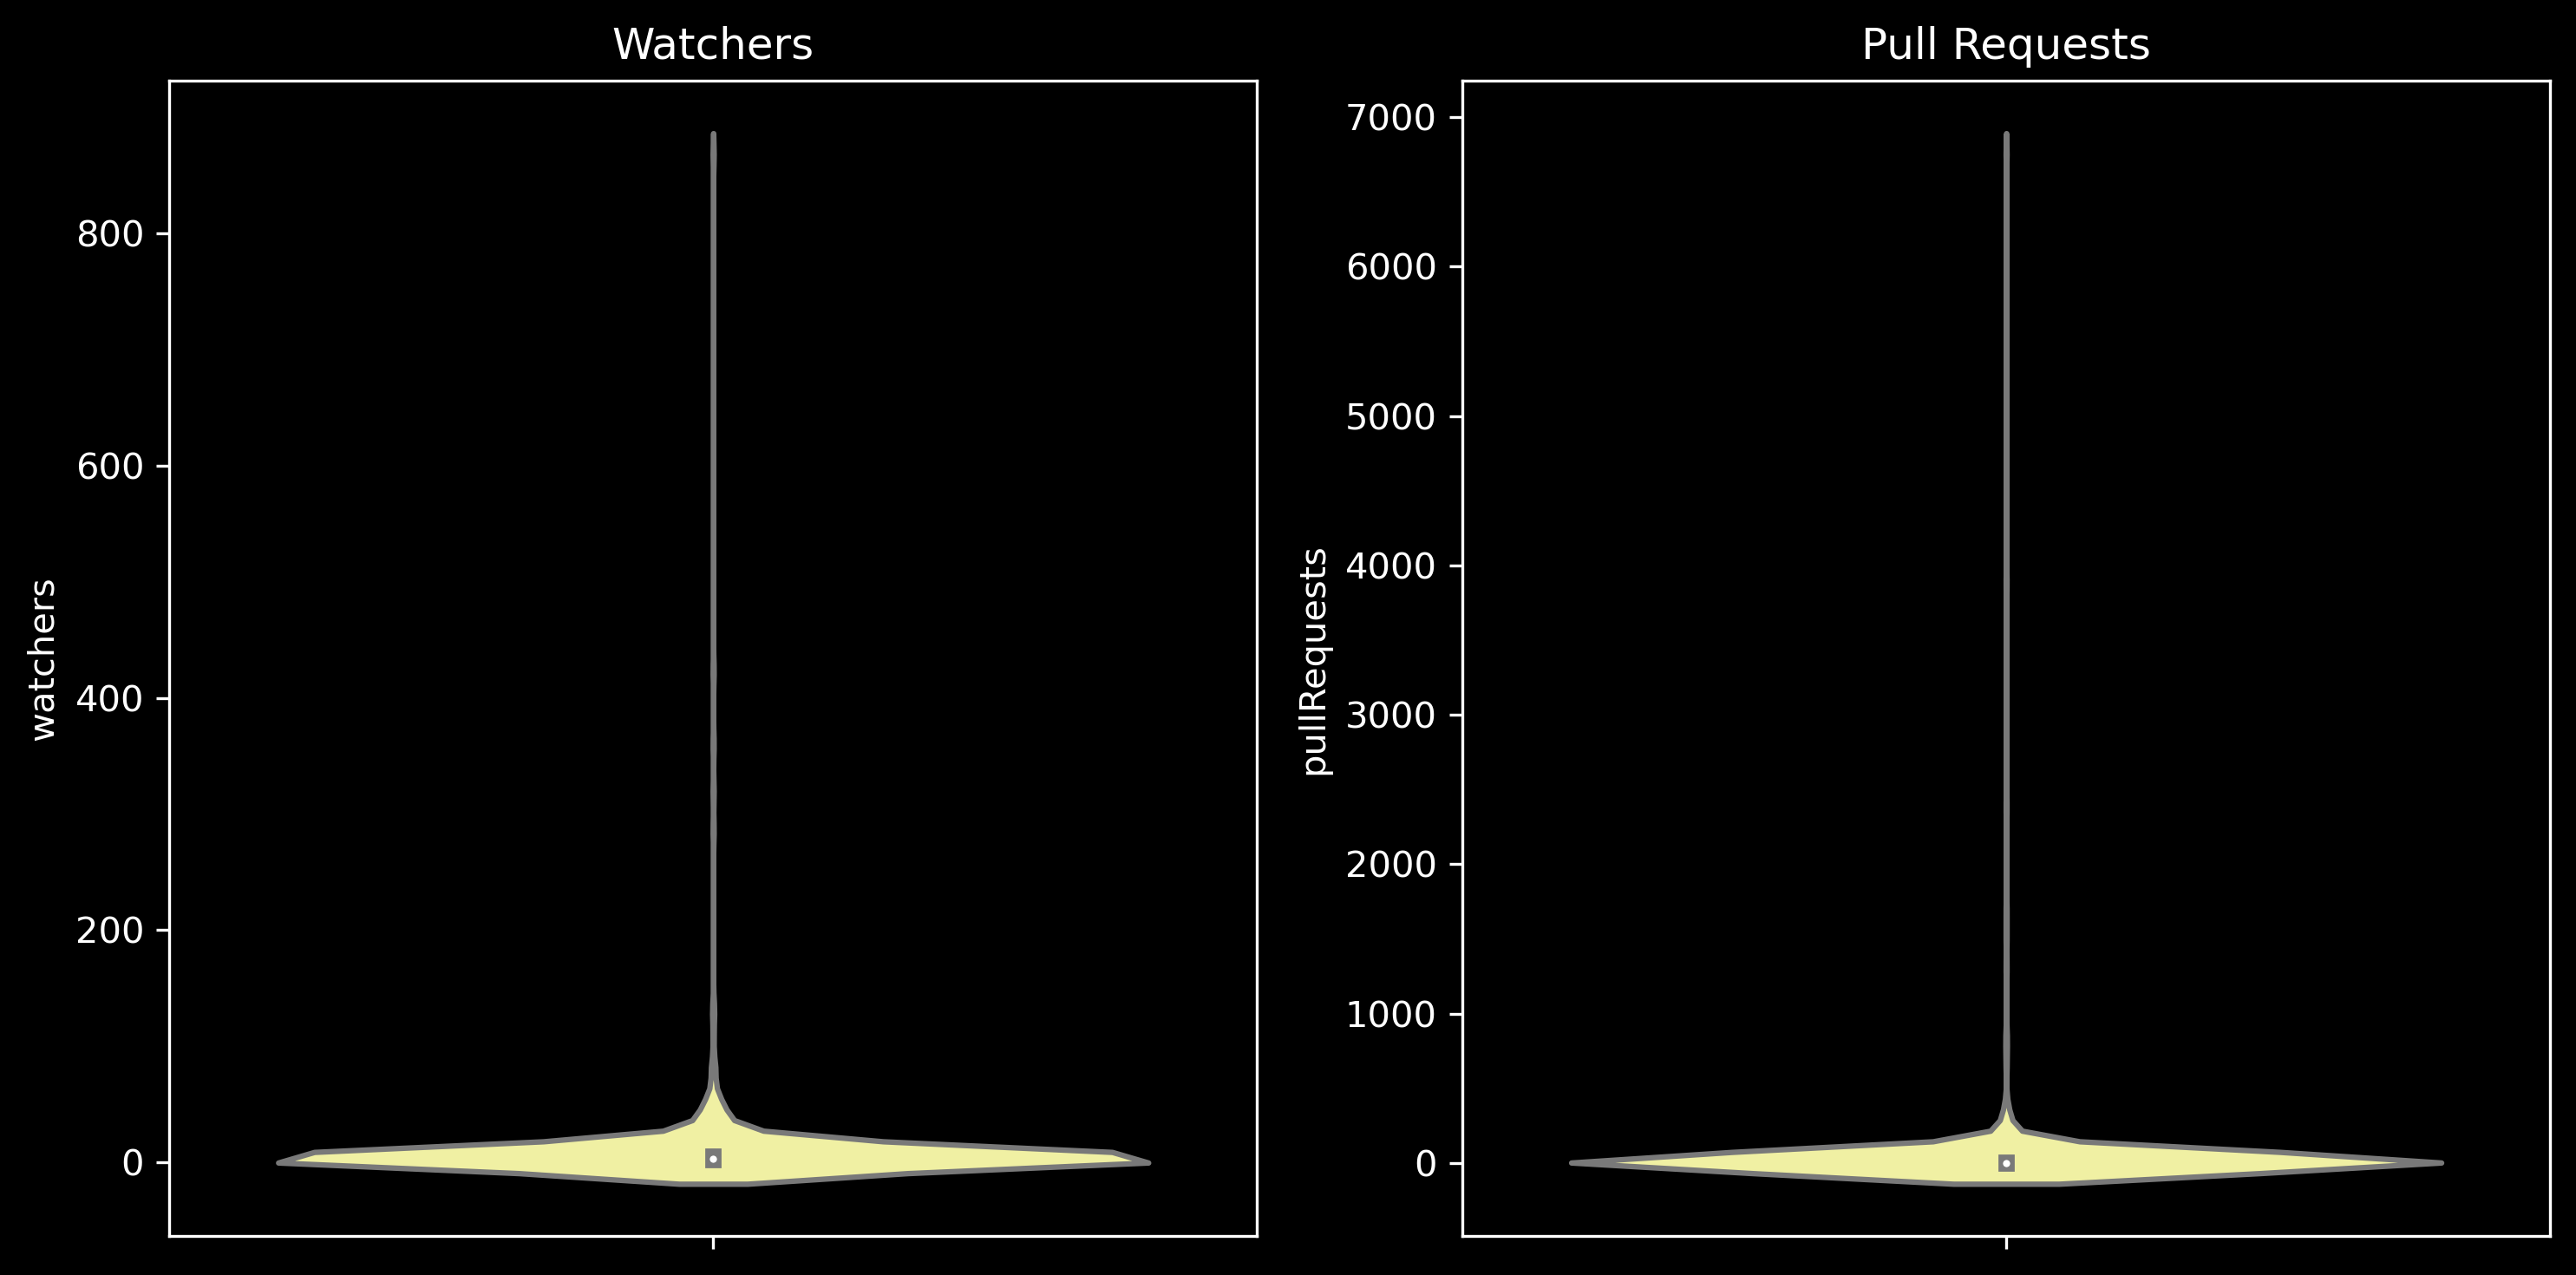

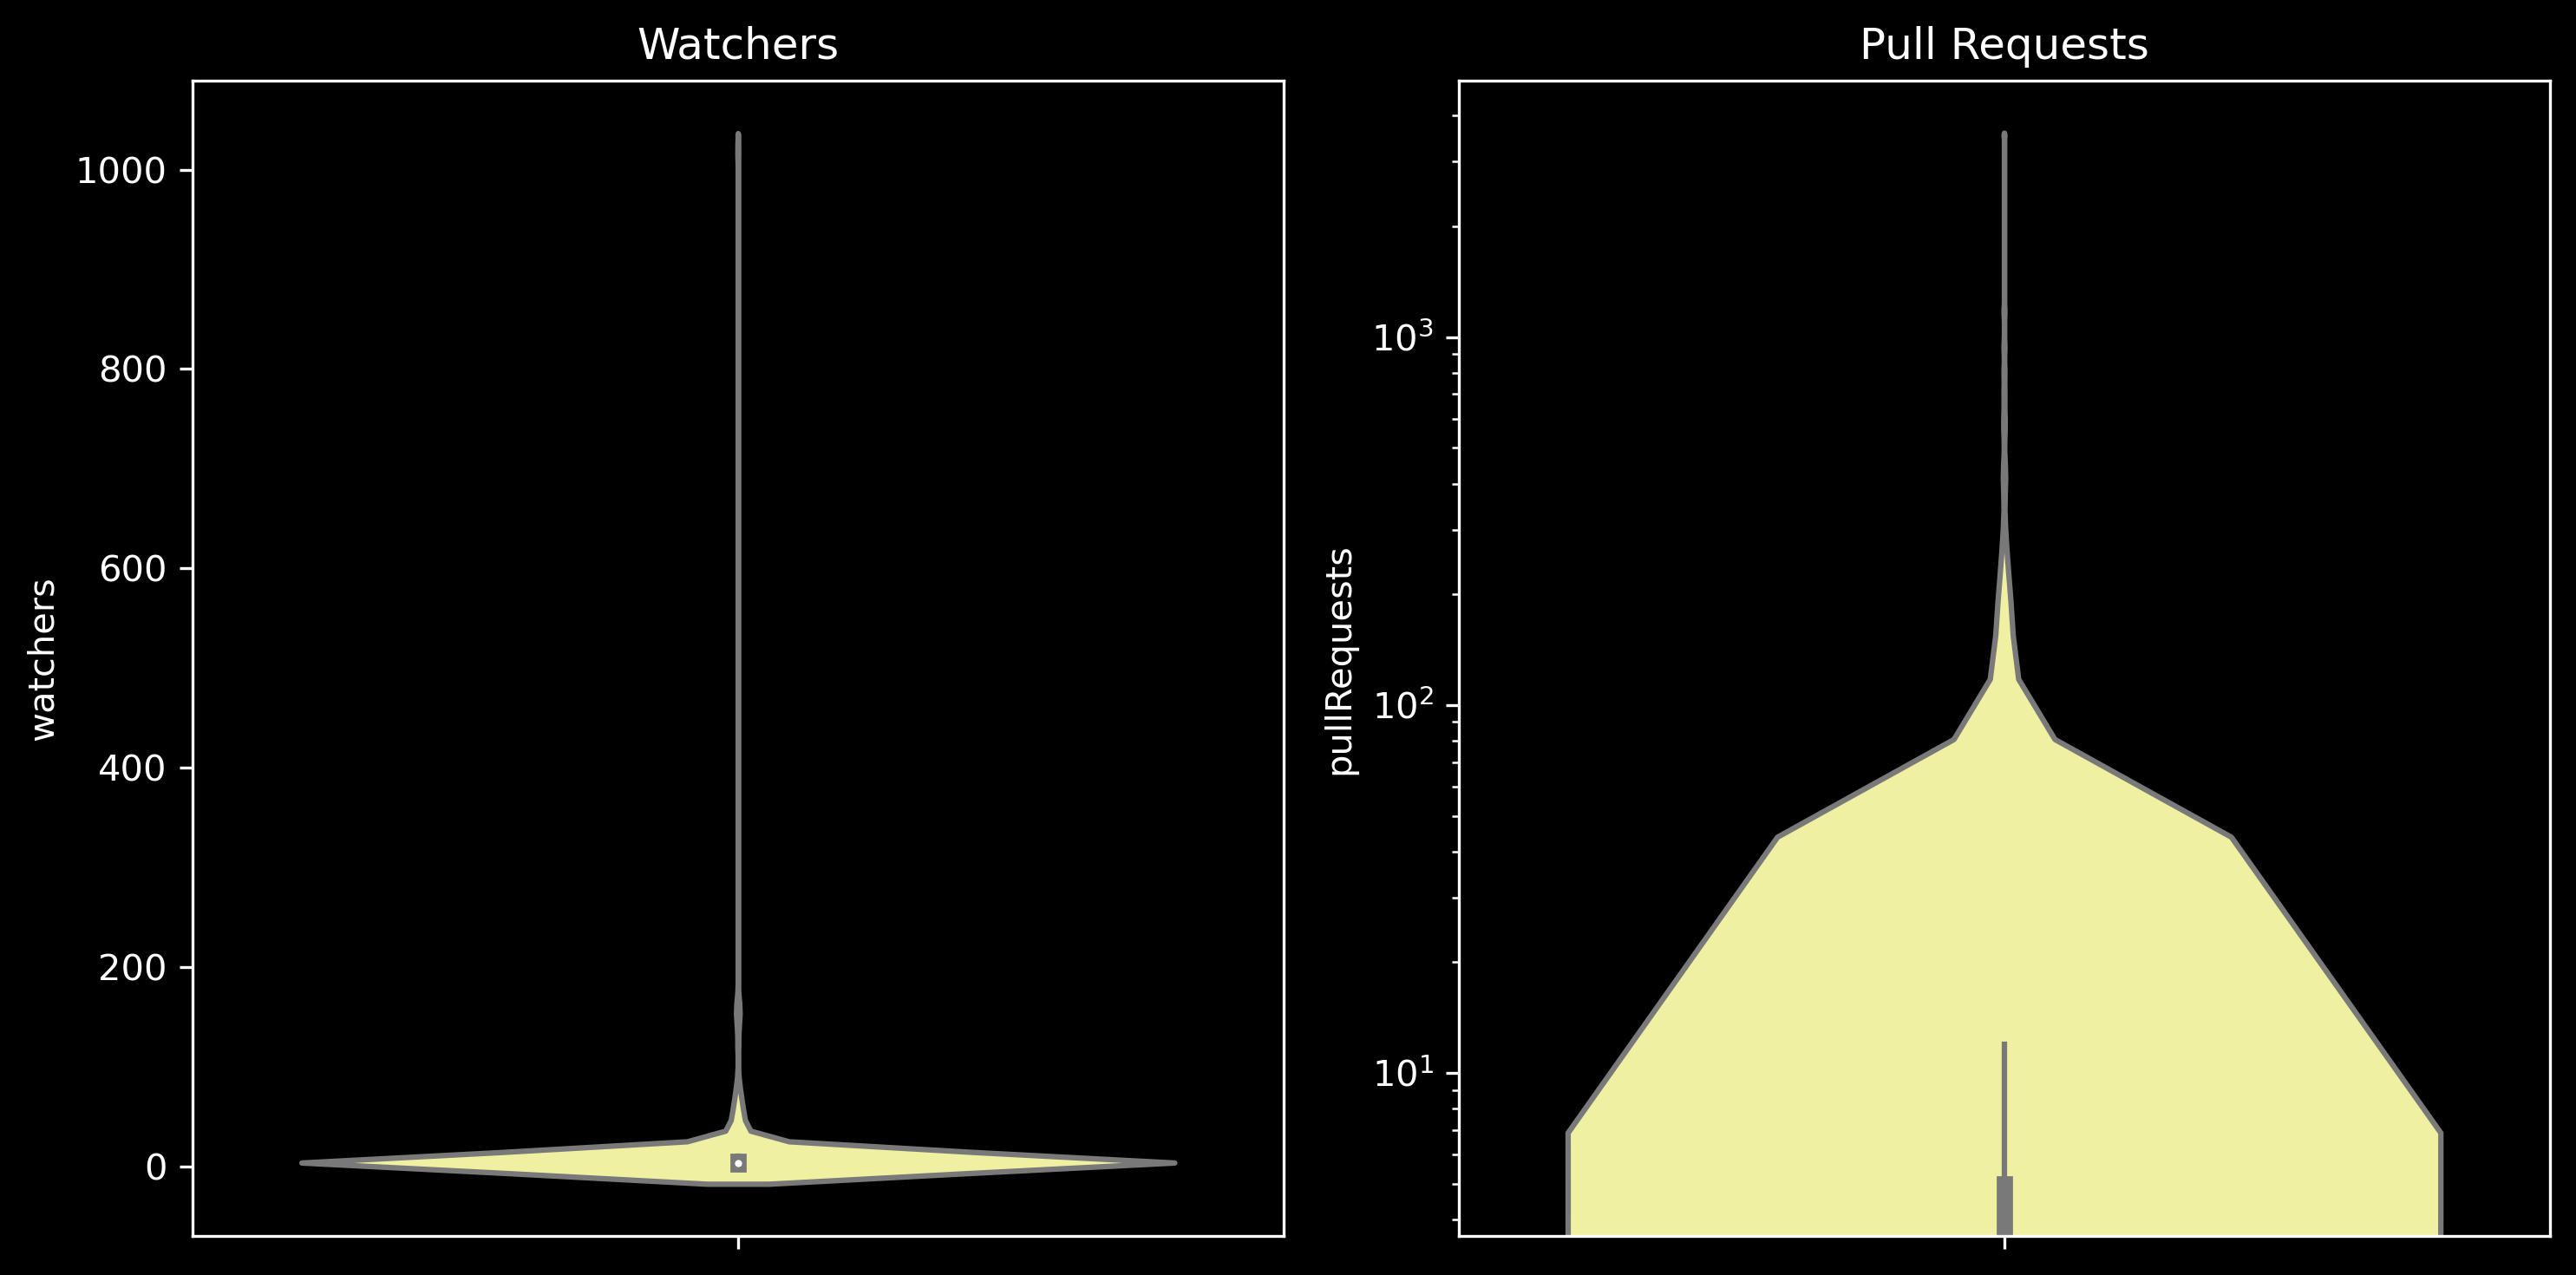

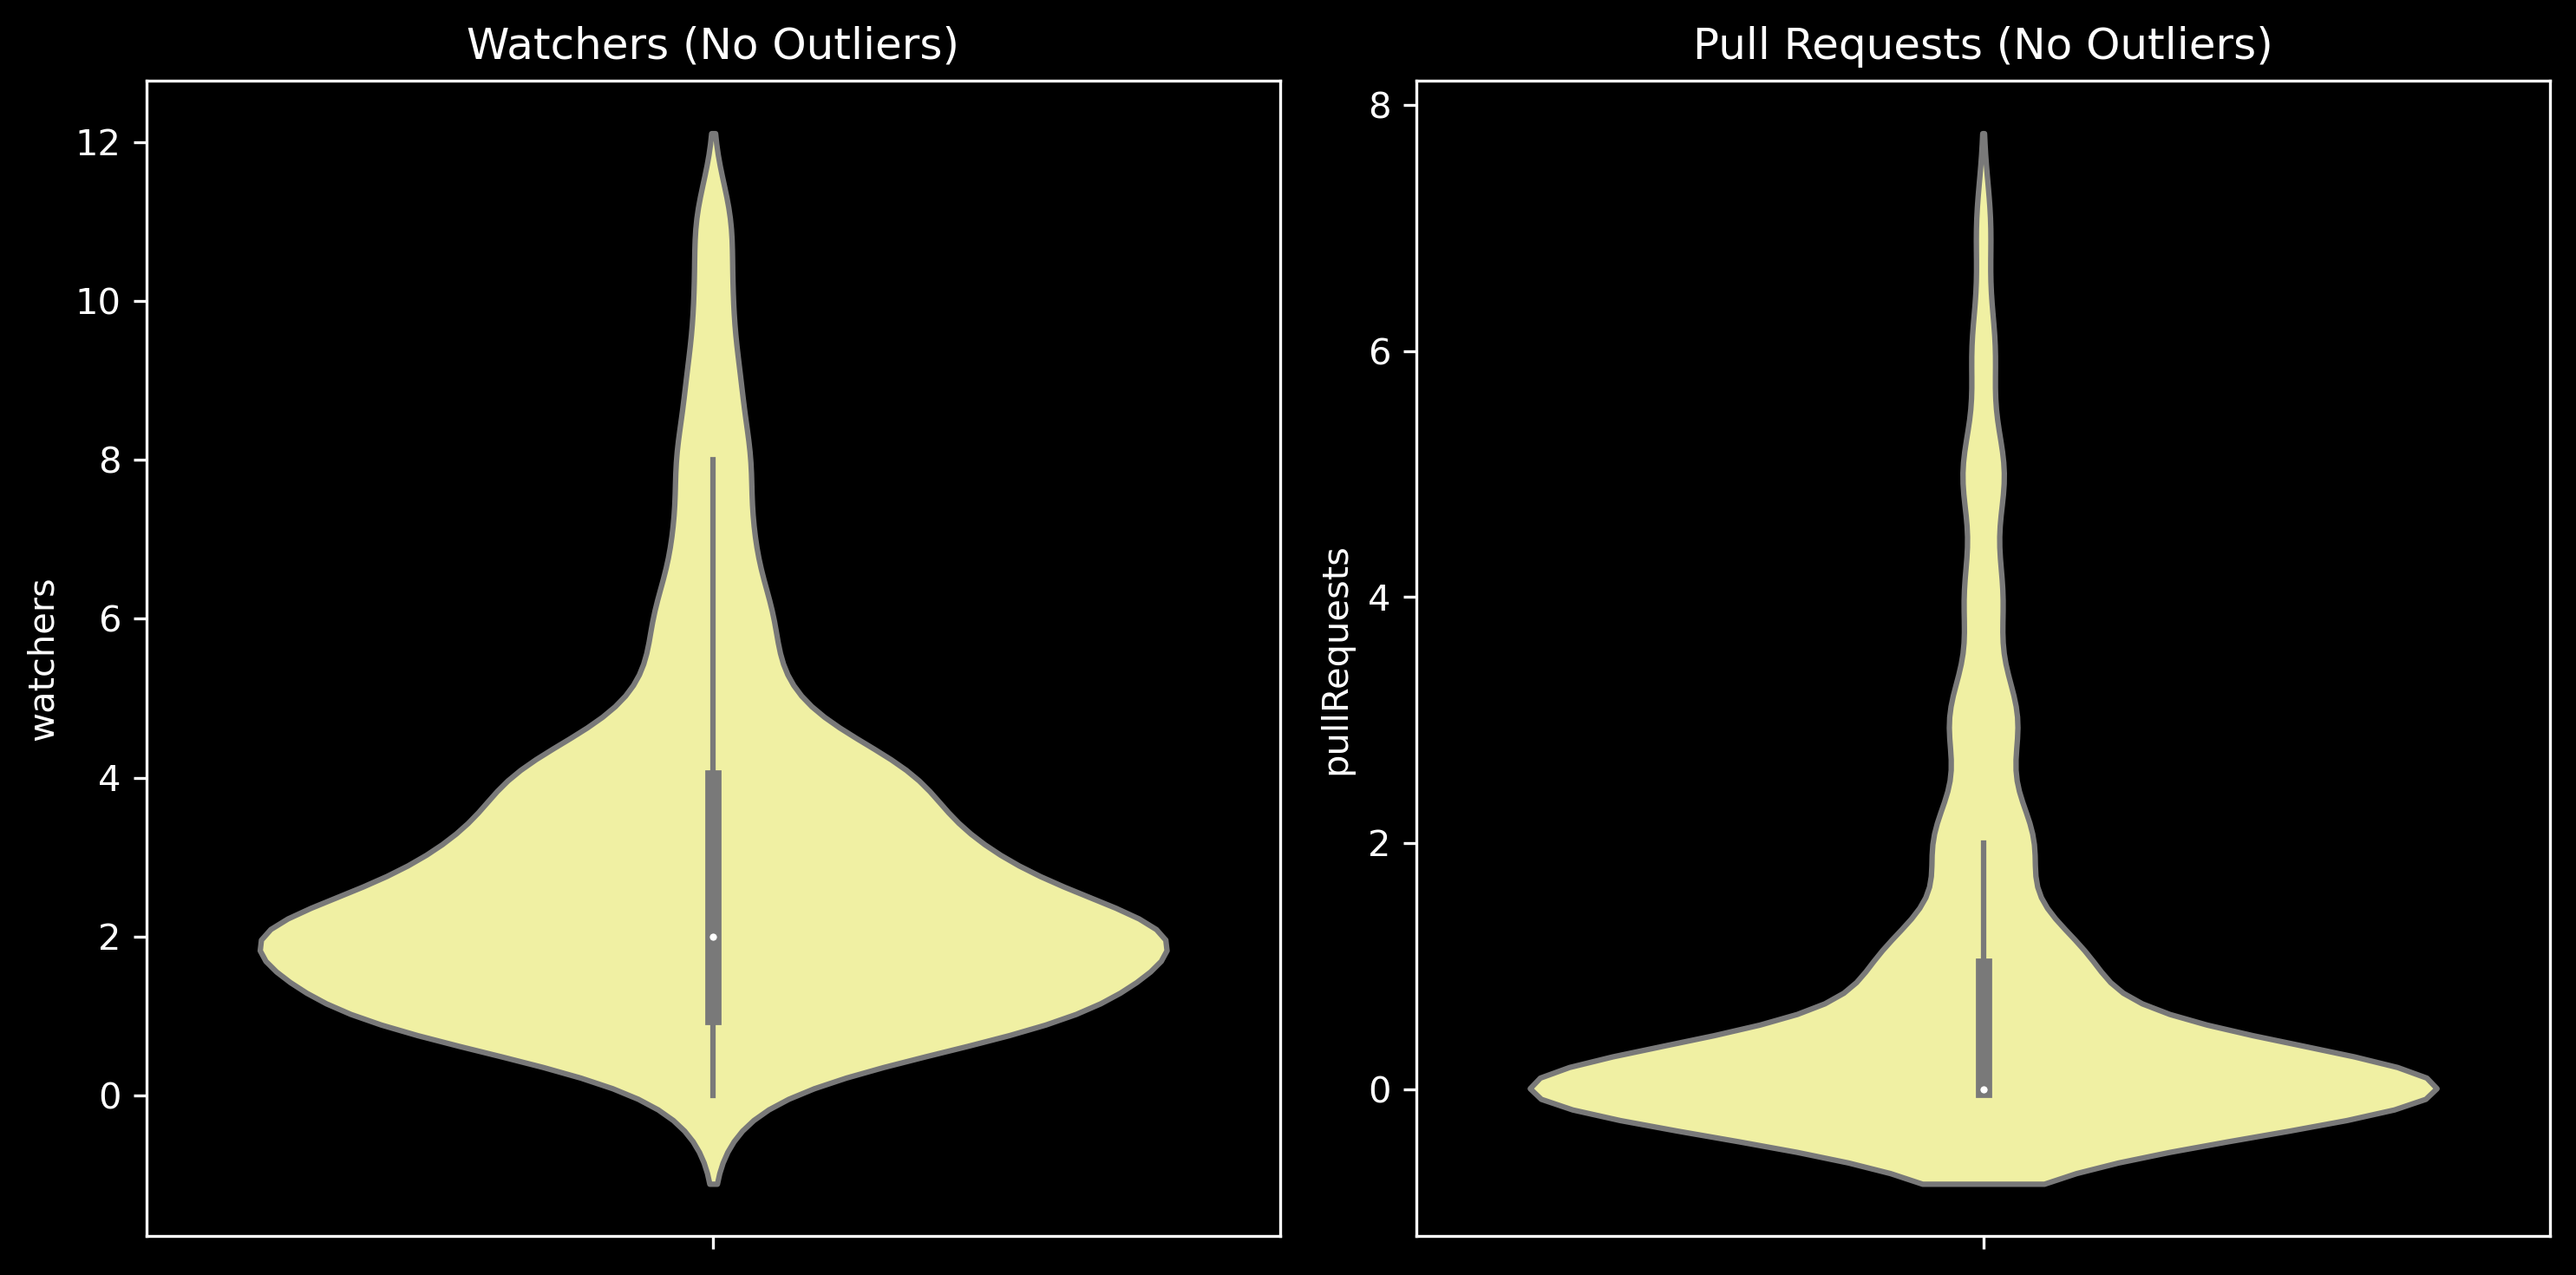

In [5]:
# TODO:Remove
def plot_violin_plots(x_data_cols, sample_size, in_log=False, titles=None):
  '''
    Plots violin plots for a sample of the given columns
  '''
  # Drop all except the given columns
  x_data_cols = x_data_cols.sample(sample_size)
  num_cols = x_data_cols.columns
  num_cols = len(num_cols)
  fig, axes = plt.subplots(1, num_cols, figsize=(10, 5))
  if num_cols == 1:
    sns.violinplot(y=x_data_cols[x_data_cols.columns[0]], ax=axes, color='#FDFD96')
    if titles is not None:
      axes.set_title(titles[0])
  else:
    for i, feat in enumerate(x_data_cols.columns):
          col = x_data_cols[feat]
          sns.violinplot(y=col, ax=axes[i % num_cols], color='#FDFD96')
          if titles is not None:
            axes[i % num_cols].set_title(titles[i % num_cols])
  if in_log:
    plt.yscale('log')
  plt.tight_layout()
  plt.show()

def remove_outliers(x_data, col):
  '''
    Removes outliers from the given column
  '''
  q1 = x_data[col].quantile(0.25)
  q3 = x_data[col].quantile(0.75)
  iqr = q3 - q1
  x_data = x_data[x_data[col] < q3 + 1.5 * iqr]
  x_data = x_data[x_data[col] > q1 - 1.5 * iqr]
  return x_data

plot_violin_plots(x_data_d[['watchers', 'pullRequests']],1000, titles=['Watchers', 'Pull Requests'])
plot_violin_plots(x_data_d[['watchers', 'pullRequests']],1000, titles=['Watchers', 'Pull Requests'], in_log=True)
x_data_o = remove_outliers(x_data_d, 'watchers')
x_data_o = remove_outliers(x_data_o, 'pullRequests')
plot_violin_plots(x_data_o[['watchers', 'pullRequests']],1000, titles=['Watchers (No Outliers)', 'Pull Requests (No Outliers)'])

<span style="font-family:Avenir;">

<table style="width:100%; border-collapse:collapse; table-layout:fixed;">
  <thead>
    <tr>
      <th style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      <font color="DeepSkyBlue">Set Expectations</font>
      </th>
      <th style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      <font color="DeepSkyBlue">Collect Data</font>
      </th>
      <th style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      <font color="DeepSkyBlue">Match Expectations & Data</font>
      </th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      There are extreme outliers in watch and contribution columns and most of the values are close to zero as github is filled with small projects from beginners.
      </td>
      <td style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      From the distribution of the data shown above (as viloin plots), we can see that distribution of the data is centered close zero and there are extreme outliers in watch and contribution columns.
      </td>
      <td style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      The data matches the expectations.
      </td>
    </tr>
  </tbody>
</table>

</span>



In [6]:
#TODO:Remove
# Chi Square Test
from scipy.stats import chi2_contingency, chi2
def chi_square_test(x_data, col1, col2):
  '''
    Performs a chi square test on the given columns
  '''
  table = pd.crosstab(x_data[col1], x_data[col2])
  stat, p, dof, expected = chi2_contingency(table)
  print('dof=%d' % dof)
  # interpret test-statistic
  prob = 0.95
  critical = chi2.ppf(prob, dof)
  print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
  if abs(stat) >= critical:
    print('Dependent (reject H0)')
  else:
    print('Independent (fail to reject H0)')
  return stat, p, dof, expected

results = chi_square_test(x_data_d, 'watchers', 'pullRequests')

dof=693578
probability=0.950, critical=695516.405, stat=17645647.575
Dependent (reject H0)


<span style="font-family:Avenir;">

<table style="width:100%; border-collapse:collapse; table-layout:fixed;">
  <thead>
    <tr>
      <th style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      <font color="DeepSkyBlue">Set Expectations</font>
      </th>
      <th style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      <font color="DeepSkyBlue">Collect Data</font>
      </th>
      <th style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      <font color="DeepSkyBlue">Match Expectations & Data</font>
      </th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      With the increase of the number of watchers, the number of pull requests increases.
      </td>
      <td style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      From the chi-square test, we can see that indeed the number of pull requests increases with the increase of the number of watchers.
      </td>
      <td style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      The data matches the expectations.
      </td>
    </tr>
  </tbody>
</table>

</span>



<span style="font-family:Avenir;">
<font color="LavenderBlush"> <h2> Model Building</h2> </font>
</span>

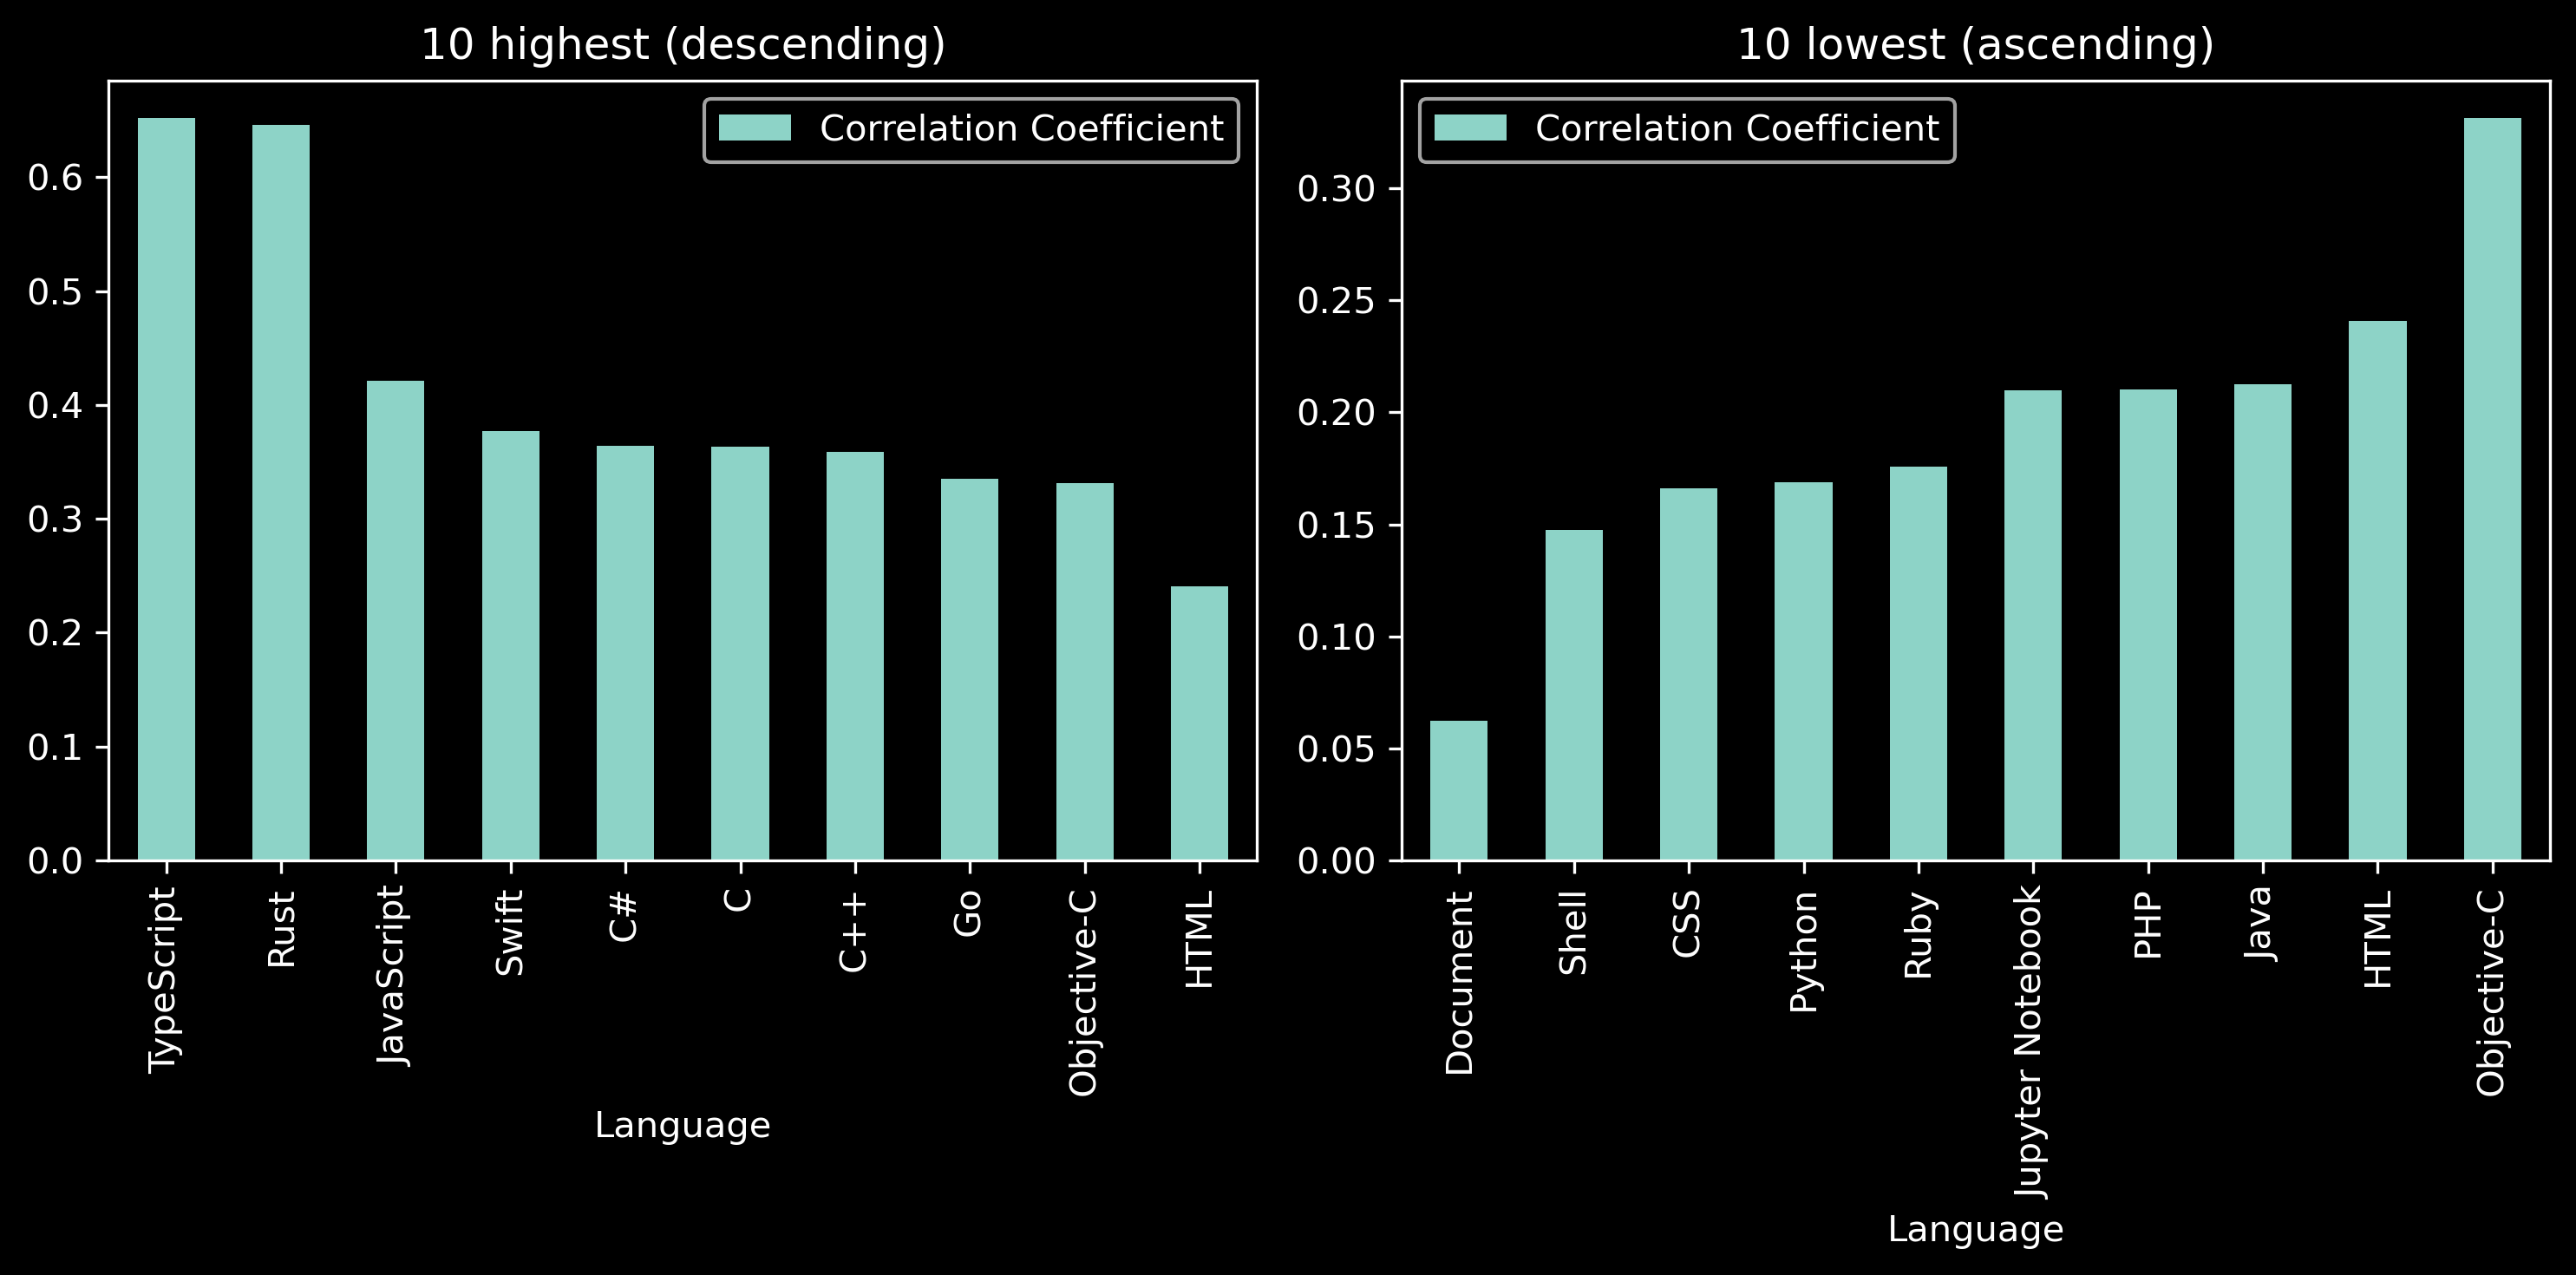

In [7]:
# TODO:Remove
# Correlation correlation coefficient (pearson) for each language
def correlation_coefficient(x_data, col1, col2):
  '''
    Returns a dictionary with the correlation coefficient for each language (regarding col1 and col2)
  '''
  languages = x_data['primaryLanguage'].unique()
  corr = {}
  for lang in languages:
    # fillter the ones with low support
    if x_data[x_data['primaryLanguage'] == lang].shape[0] > 2500:
      corr[lang] = x_data[x_data['primaryLanguage'] == lang][[col1, col2]].corr(method='pearson').iloc[0,1]
  return corr

def plot_correlation_coefficient(corr):
  '''
    Plots the correlation coefficient in histogram from one for the highest and one for lowest values
  '''
  fig, axes = plt.subplots(1, 2, figsize=(10, 5))
  # 10 highest (descending)
  highest = sorted(corr.items(), key=lambda x: x[1], reverse=True)[:10]
  highest = pd.DataFrame(highest, columns=['Language', 'Correlation Coefficient'])
  highest.plot(kind='bar', x='Language', y='Correlation Coefficient', title='10 highest (descending)', ax=axes[0])
  # 10 lowest (ascending)
  lowest = sorted(corr.items(), key=lambda x: x[1])[:10]
  lowest = pd.DataFrame(lowest, columns=['Language', 'Correlation Coefficient'])
  lowest.plot(kind='bar', x='Language', y='Correlation Coefficient', title='10 lowest (ascending)', ax=axes[1])
  
  plt.tight_layout()
  plt.show()

corr = correlation_coefficient(x_data_d, 'watchers', 'pullRequests')
plot_correlation_coefficient(corr)

<span style="font-family:Avenir;">

<table style="width:100%; border-collapse:collapse; table-layout:fixed;">
  <thead>
    <tr>
      <th style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      <font color="DeepSkyBlue">Set Expectations</font>
      </th>
      <th style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      <font color="DeepSkyBlue">Collect Data</font>
      </th>
      <th style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      <font color="DeepSkyBlue">Match Expectations & Data</font>
      </th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      The correlation coefficient will allow us to see the relationship between the number of watchers and the number of pull requests.
      </td>
      <td style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      From the correlation coefficient, we can see that there are some languages that has a stronger correlation between the number of watchers and the number of pull requests than others (implying that the engagement of the community is higher in those languages).
      </td>
      <td style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      The model was able to answer the question.
      </td>
    </tr>
  </tbody>
</table>

</span>



<span style="font-family:Avenir;">
<font color="LavenderBlush"> <h2> Results & Interpretation</h2> </font>
</span>

In [8]:
convey_insights(["Typrscript has the highest correlation coefficient between watchers and pull requests",
                 "Document repositories have the lowest correlation coefficient between watchers and pull requests (seems logical)",
                 "The is still a weak correlation between watchers and pull requests for the most famous on github javascript",
                 ])

<h3><font color="pink" size=5>Insights</font></h3> <font size=4>
<font color="pink">✦</font> Typrscript has the highest correlation coefficient between watchers and pull requests<br><br><font color="pink">✦</font> Document repositories have the lowest correlation coefficient between watchers and pull requests (seems logical)<br><br><font color="pink">✦</font> The is still a weak correlation between watchers and pull requests for the most famous on github javascript<br><br></font>

<span style="font-family:Avenir;">

<table style="width:100%; border-collapse:collapse; table-layout:fixed;">
  <thead>
    <tr>
      <th style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      <font color="DeepSkyBlue">Set Expectations</font>
      </th>
      <th style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      <font color="DeepSkyBlue">Collect Data</font>
      </th>
      <th style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      <font color="DeepSkyBlue">Match Expectations & Data</font>
      </th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      The corelation between the number of watchers and the number of pull requests is understood.
      </td>
      <td style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      Shown in insights.
      </td>
      <td style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      The question is answered.
      </td>
    </tr>
  </tbody>
</table>

</span>



<span style="font-family:Avenir;">
<font color="LavenderBlush"> <h2> Communicating Results</h2> </font>
</span>

In [9]:
### Probably code that will generate markdown

<span style="font-family:Avenir;">

<table style="width:100%; border-collapse:collapse; table-layout:fixed;">
  <thead>
    <tr>
      <th style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      <font color="DeepSkyBlue">Set Expectations</font>
      </th>
      <th style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      <font color="DeepSkyBlue">Collect Data</font>
      </th>
      <th style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      <font color="DeepSkyBlue">Match Expectations & Data</font>
      </th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      Its as expected
      </td>
      <td style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      This is my data
      </td>
      <td style="padding:10px; border:0.5px solid grey; text-align: center; width:33.33%;">
      Suppose data is expectations; done.
      </td>
    </tr>
  </tbody>
</table>

</span>

